# Vacuum spacetimes with toroidal null infinities Schmidt
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 22, 2022

https://pure.mpg.de/rest/items/item_153062/component/file_153061/content

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,x,y,z,dt,dx,dy,dz = symbols('t x y z dt dx dy dz')

In [4]:
M = Function('M')(t,z)
M

In [5]:
W = Function('W')(t,z)
W

In [6]:
variables = Matrix([t,x,y,z])
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix([dt,dx,dy,dz])
differentials 

⎡dt⎤
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [8]:
#  equation 3.1 
lineElement = expand( exp(2*M)*(-dt**2 + dz**2) + t*(exp(W)*dx**2 + exp(-W)*dy**2) ) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅M(t, z)                                     ⎤
⎢-ℯ               0            0           0     ⎥
⎢                                                ⎥
⎢                W(t, z)                         ⎥
⎢     0       t⋅ℯ              0           0     ⎥
⎢                                                ⎥
⎢                            -W(t, z)            ⎥
⎢     0           0       t⋅ℯ              0     ⎥
⎢                                                ⎥
⎢                                       2⋅M(t, z)⎥
⎣     0           0            0       ℯ         ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  2⋅M(t, z)                                     ⎤
⎢-ℯ               0            0           0     ⎥
⎢                                                ⎥
⎢                W(t, z)                         ⎥
⎢     0       t⋅ℯ              0           0     ⎥
⎢                                                ⎥
⎢                            -W(t, z)            ⎥
⎢     0           0       t⋅ℯ              0     ⎥
⎢                                                ⎥
⎢                                       2⋅M(t, z)⎥
⎣     0           0            0       ℯ         ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t x y z")
t,x,y,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂                                                                                         
⎢⎢──(M(t, z))                      0                                           0            
⎢⎢∂t                                                                                        
⎢⎢                                                                                          
⎢⎢             ⎛  ∂              ⎞  -2⋅M(t, z) + W(t, z)                                    
⎢⎢             ⎜t⋅──(W(t, z)) + 1⎟⋅ℯ                                                        
⎢⎢             ⎝  ∂t             ⎠                                                          
⎢⎢     0       ─────────────────────────────────────────                       0            
⎢⎢                                 2                                                        
⎢⎢                                                                                          
⎢⎢                                                        ⎛    ∂      

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                             2                                             
⎢                                ⎛∂          ⎞    ∂                                         
⎢    2              2            ⎜──(W(t, z))⎟    ──(M(t, z))                               
⎢   ∂              ∂             ⎝∂t         ⎠    ∂t             1                          
⎢- ───(M(t, z)) + ───(M(t, z)) - ────────────── + ─────────── + ────                        
⎢    2              2                  2               t           2                        
⎢  ∂t             ∂z                                            2⋅t                         
⎢                                                                                           
⎢                                                                     ⎛    2                
⎢                                                                     ⎜   ∂                ∂
⎢                                                                     

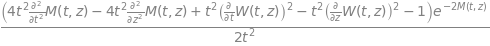

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                    ⎛       2              
⎢                                             2                      ⎜   2  ∂               
⎢                                ⎛∂          ⎞    ∂             0.25⋅⎜4⋅t ⋅───(M(t, z)) - 4⋅
⎢    2              2            ⎜──(W(t, z))⎟    ──(M(t, z))        ⎜       2              
⎢   ∂              ∂             ⎝∂t         ⎠    ∂t                 ⎝     ∂t               
⎢- ───(M(t, z)) + ───(M(t, z)) - ────────────── + ─────────── + ────────────────────────────
⎢    2              2                  2               t                                    
⎢  ∂t             ∂z                                                                        
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [21]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                             2                                             
⎢                                ⎛∂          ⎞    ∂                                         
⎢    2              2            ⎜──(W(t, z))⎟    ──(M(t, z))                               
⎢   ∂              ∂             ⎝∂t         ⎠    ∂t             1                          
⎢- ───(M(t, z)) + ───(M(t, z)) - ────────────── + ─────────── + ────                        
⎢    2              2                  2               t           2                        
⎢  ∂t             ∂z                                            2⋅t                         
⎢                                                                                           
⎢                                                                     ⎛    2                
⎢                                                                     ⎜   ∂                ∂
⎢                                                                     

In [22]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                  ∂                                        
⎢                    2                     2   1.0⋅──(M(t, z))                              
⎢       ⎛∂          ⎞         ⎛∂          ⎞        ∂t            0.25                       
⎢- 0.25⋅⎜──(W(t, z))⎟  - 0.25⋅⎜──(W(t, z))⎟  + ─────────────── + ────                       
⎢       ⎝∂t         ⎠         ⎝∂z         ⎠           t            2                        
⎢                                                                 t                         
⎢                                                                                           
⎢                                                                      ⎛                    
⎢                                                                      ⎜                    
⎢                                                                      ⎜                    
⎢                                                                     

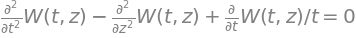

In [35]:
equation3pt2 = Eq(expand((1/t)*ricciSimplified[1,1].args[1]),0)
equation3pt2

In [29]:
equation3pt3 = Eq(diff(M,t), expand( solve( einsteinSimplified[0,0], diff(M,t))[0] ) )
equation3pt3

In [25]:
equation3pt4 = Eq(diff(M,z), solve( einsteinSimplified[3,0], diff(M,z) )[0] ) 
equation3pt4

In [37]:
vacuumFieldEquations = Matrix([equation3pt2,equation3pt3,equation3pt4])
vacuumFieldEquations

⎡                                        ∂                         ⎤
⎢            2              2            ──(W(t, z))               ⎥
⎢           ∂              ∂             ∂t                        ⎥
⎢          ───(W(t, z)) - ───(W(t, z)) + ─────────── = 0           ⎥
⎢            2              2                 t                    ⎥
⎢          ∂t             ∂z                                       ⎥
⎢                                                                  ⎥
⎢                                  2                       2       ⎥
⎢∂                    ⎛∂          ⎞           ⎛∂          ⎞    0.25⎥
⎢──(M(t, z)) = 0.25⋅t⋅⎜──(W(t, z))⎟  + 0.25⋅t⋅⎜──(W(t, z))⎟  - ────⎥
⎢∂t                   ⎝∂t         ⎠           ⎝∂z         ⎠     t  ⎥
⎢                                                                  ⎥
⎢                             ∂           ∂                        ⎥
⎢                           t⋅──(W(t, z))⋅──(W(t, z))              ⎥
⎢             ∂               ∂t  

In [54]:
equation3pt5a = lineElement.subs(W,0)
equation3pt5a

In [44]:
integrateMwrtT = pdsolve( equation3pt3.subs(W,0).doit() , M ) 
integrateMwrtT

In [50]:
mSolution = integrateMwrtT.subs(integrateMwrtT.args[1].args[1],0)
mSolution